<a href="https://colab.research.google.com/github/Yarek1/CNN-CIFAR-10-100/blob/master/CIFAR_100_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data

In [21]:
#load data 
data = tf.keras.datasets.cifar100
(X_train, y_train), (X_test, y_test) = data.load_data()
 
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')


Training set shape: (50000, 32, 32, 3), Testing set shape: (10000, 32, 32, 3)


## Visualization

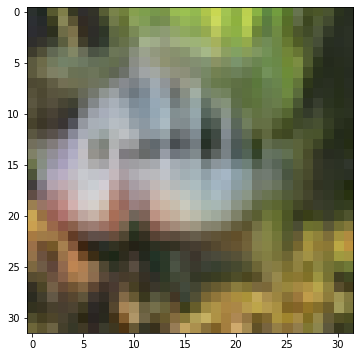

In [4]:
# Randomly choosed picture
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(X_train[4])
plt.show()

In [5]:
# Class names
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [6]:
y_train=y_train.tolist()
import itertools
y_train=list(itertools.chain(*y_train))

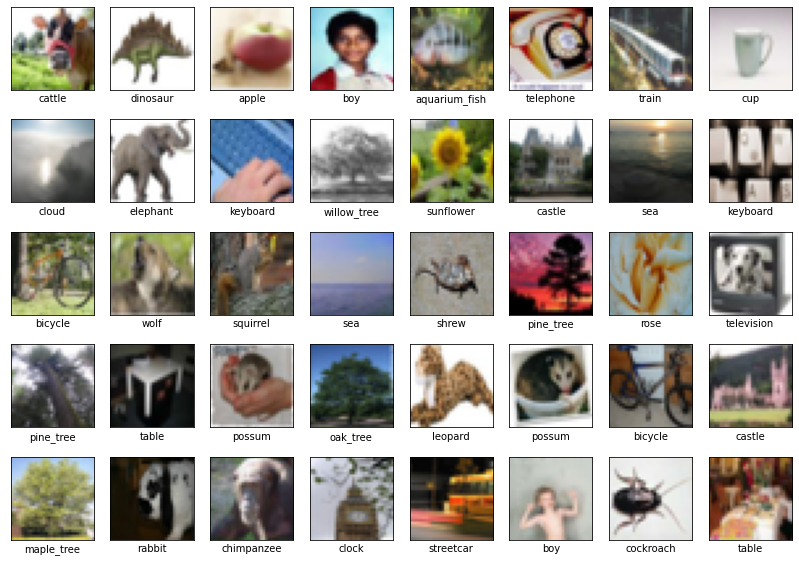

In [7]:
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Data preprocessing

In [8]:
from tensorflow.keras.utils import to_categorical
 
y_train = to_categorical(y_train, len(class_names))
y_test = to_categorical(y_test, len(class_names))

In [9]:
# Parse numbers as floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize data
X_train = X_train / 255
X_test = X_test / 255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D


In [11]:
print("Tensorflow version:",tf.version.VERSION)


Tensorflow version: 2.2.0


## CNN model for 100 output classes

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [14]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=25,
                    verbose=1,
                    batch_size = 50,
                    validation_split = 0.2
                   )

Epoch 1/25
800/800 [==============================] - 11s 13ms/step - loss: 3.8836 - accuracy: 0.1024 - val_loss: 3.3743 - val_accuracy: 0.1827
Epoch 2/25
800/800 [==============================] - 10s 13ms/step - loss: 3.1766 - accuracy: 0.2233 - val_loss: 2.9551 - val_accuracy: 0.2631
Epoch 3/25
800/800 [==============================] - 10s 13ms/step - loss: 2.8429 - accuracy: 0.2854 - val_loss: 2.8269 - val_accuracy: 0.2913
Epoch 4/25
800/800 [==============================] - 10s 13ms/step - loss: 2.6280 - accuracy: 0.3273 - val_loss: 2.6603 - val_accuracy: 0.3339
Epoch 5/25
800/800 [==============================] - 10s 13ms/step - loss: 2.4520 - accuracy: 0.3661 - val_loss: 2.4910 - val_accuracy: 0.3677
Epoch 6/25
800/800 [==============================] - 10s 13ms/step - loss: 2.3126 - accuracy: 0.3965 - val_loss: 2.4679 - val_accuracy: 0.3726
Epoch 7/25
800/800 [==============================] - 10s 13ms/step - loss: 2.1865 - accuracy: 0.4205 - val_loss: 2.4490 - val_accuracy:

In [15]:
# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.5820813179016113 / Test accuracy: 0.4113999903202057


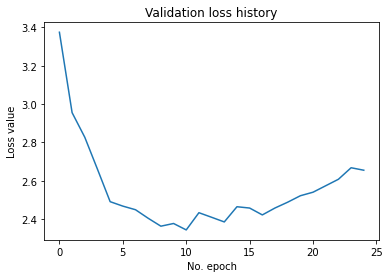

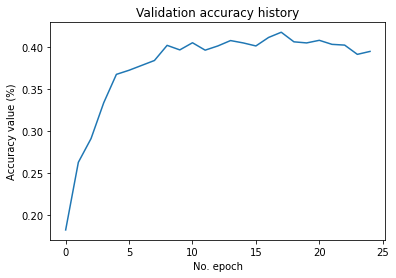

In [16]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

As we can see result on 40 % accuarcy of aour model is low, it's because we have 100 different classes and only 50000 training examples. Also convolution neural network can be replace by most complicated models. Now we check our model when we have only 10 classes on output

In [3]:
#load data 
data2 = tf.keras.datasets.cifar10
(x_train2, y_train2), (x_test2, y_test2) = data2.load_data()
# x_train2 - training data(images), y_train2 - labels(digits)

print(f'Training set shape: {x_train2.shape}, Testing set shape: {x_test2.shape}')


170500096/170498071 [==============================] - 4s 0us/step
Training set shape: (50000, 32, 32, 3), Testing set shape: (10000, 32, 32, 3)


In [4]:
class_names2=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

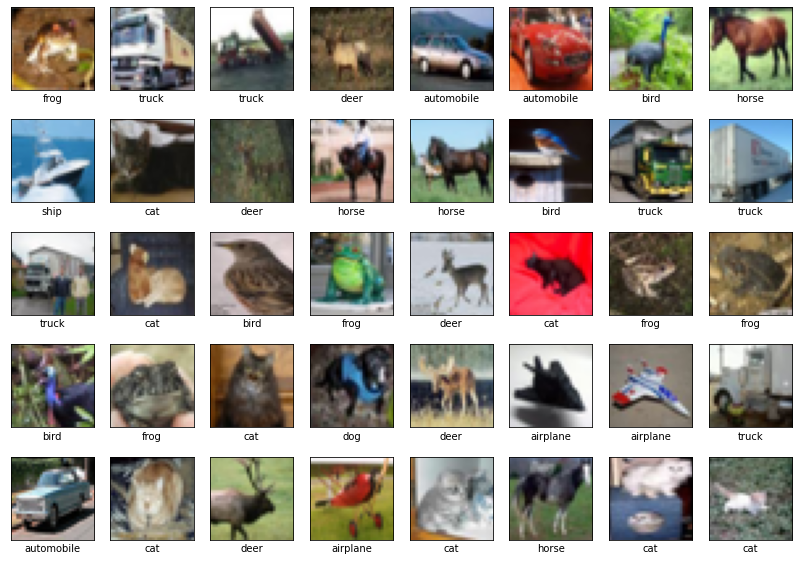

In [5]:
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(x_train2[i]) 
    plt.xlabel(class_names2[y_train2[i][0]]) # take label of train dataset and return name of class
plt.show()

In [6]:
from tensorflow.keras.utils import to_categorical

y_train2 = to_categorical(y_train2, len(class_names2))
y_test2 = to_categorical(y_test2, len(class_names2))

In [7]:
# Parse numbers as floats
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')

# Normalize data
x_train2 = x_train2 / 255
x_test2 = x_test2 / 255

## CNN model for 10 output classes

In [10]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=x_train2.shape[1:]))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3),activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [12]:
history2 = model2.fit(x_train2, 
                    y_train2, 
                    epochs=25,
                    verbose=1,
                    batch_size = 50,
                    validation_split = 0.2
                   )

Epoch 1/25
800/800 [==============================] - 105s 131ms/step - loss: 1.6162 - accuracy: 0.4080 - val_loss: 1.3131 - val_accuracy: 0.5289
Epoch 2/25
800/800 [==============================] - 104s 131ms/step - loss: 1.2177 - accuracy: 0.5632 - val_loss: 1.1332 - val_accuracy: 0.5980
Epoch 3/25
800/800 [==============================] - 104s 130ms/step - loss: 1.0603 - accuracy: 0.6214 - val_loss: 0.9592 - val_accuracy: 0.6662
Epoch 4/25
800/800 [==============================] - 104s 131ms/step - loss: 0.9520 - accuracy: 0.6630 - val_loss: 0.8886 - val_accuracy: 0.6921
Epoch 5/25
800/800 [==============================] - 104s 130ms/step - loss: 0.8735 - accuracy: 0.6923 - val_loss: 0.9529 - val_accuracy: 0.6630
Epoch 6/25
800/800 [==============================] - 107s 134ms/step - loss: 0.8101 - accuracy: 0.7139 - val_loss: 0.8261 - val_accuracy: 0.7132
Epoch 7/25
800/800 [==============================] - 104s 130ms/step - loss: 0.7477 - accuracy: 0.7387 - val_loss: 0.8418 -

In [13]:
# Generate generalization metrics
score = model2.evaluate(x_test2, y_test2, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.8492079973220825 / Test accuracy: 0.7516999840736389


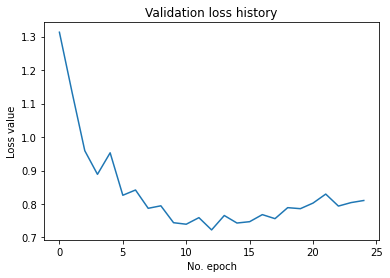

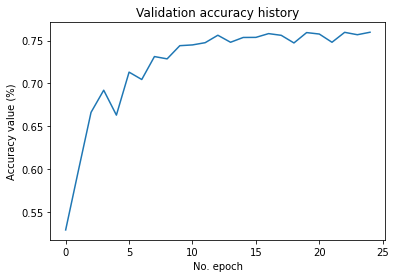

In [14]:
# Visualize history
# Plot history: Loss
plt.plot(history2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

Our model have accuracy on 75%, but it's related with number of classes. Now it's only 10 and previous model had 100. In the next step we should consider update model to get better performance. We will change a optimizer to Stochastic Gradient descent, architecture of network and add kernel regularizer to avoid overfitting.


In [18]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

In [26]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=x_train2.shape[1:],
                  kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=x_train2.shape[1:],
                  kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3),activation='relu', padding='same',
                  kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D((2, 2),padding="same"))
model3.add(Conv2D(64, (3, 3),activation='relu', padding='same',
                  kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D((2, 2),padding="same"))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D((2, 2),padding="same"))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D((2, 2),padding="same"))
model3.add(Dropout(0.4))

model3.add(Flatten())
model3.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 4, 4, 64)         

In [28]:
history3 = model3.fit(x_train2, 
                    y_train2, 
                    epochs=30,
                    verbose=1,
                    batch_size = 64,
                    validation_split = 0.2
                   )

Epoch 1/30
625/625 [==============================] - 78s 124ms/step - loss: 2.6556 - accuracy: 0.1042 - val_loss: 2.6506 - val_accuracy: 0.1054
Epoch 2/30
625/625 [==============================] - 77s 124ms/step - loss: 2.6448 - accuracy: 0.1228 - val_loss: 2.6395 - val_accuracy: 0.1000
Epoch 3/30
625/625 [==============================] - 77s 124ms/step - loss: 2.6214 - accuracy: 0.1568 - val_loss: 2.5906 - val_accuracy: 0.1659
Epoch 4/30
625/625 [==============================] - 78s 125ms/step - loss: 2.5055 - accuracy: 0.1778 - val_loss: 2.4641 - val_accuracy: 0.1736
Epoch 5/30
625/625 [==============================] - 78s 125ms/step - loss: 2.3921 - accuracy: 0.1965 - val_loss: 2.3190 - val_accuracy: 0.2100
Epoch 6/30
625/625 [==============================] - 81s 130ms/step - loss: 2.3228 - accuracy: 0.2007 - val_loss: 2.2931 - val_accuracy: 0.2013
Epoch 7/30
625/625 [==============================] - 78s 125ms/step - loss: 2.2730 - accuracy: 0.2049 - val_loss: 2.2073 - val_ac

In [29]:
# Generate generalization metrics
score = model3.evaluate(x_test2, y_test2, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.4225620031356812 / Test accuracy: 0.5641000270843506


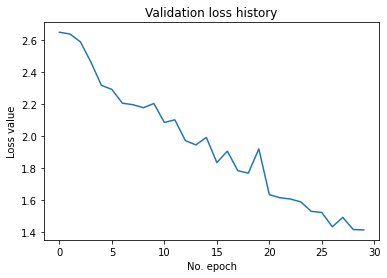

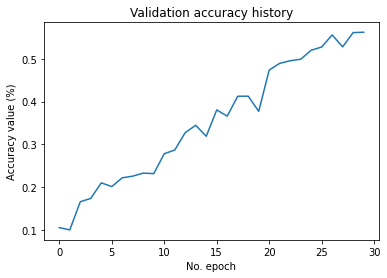

In [31]:
# Visualize history
# Plot history: Loss
plt.plot(history3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

We can observe that we need more epochs, the model still learns

In [33]:
history4 = model3.fit(x_train2, 
                    y_train2, 
                    epochs=120,
                    verbose=1,
                    batch_size = 64,
                    validation_split = 0.2
                   )

Epoch 1/120
625/625 [==============================] - 80s 127ms/step - loss: 1.4446 - accuracy: 0.5541 - val_loss: 1.3361 - val_accuracy: 0.5901
Epoch 2/120
625/625 [==============================] - 80s 128ms/step - loss: 1.4275 - accuracy: 0.5566 - val_loss: 1.3701 - val_accuracy: 0.5743
Epoch 3/120
625/625 [==============================] - 82s 131ms/step - loss: 1.4036 - accuracy: 0.5674 - val_loss: 1.3166 - val_accuracy: 0.6027
Epoch 4/120
625/625 [==============================] - 83s 133ms/step - loss: 1.3811 - accuracy: 0.5753 - val_loss: 1.3268 - val_accuracy: 0.5877
Epoch 5/120
625/625 [==============================] - 82s 131ms/step - loss: 1.3654 - accuracy: 0.5833 - val_loss: 1.3082 - val_accuracy: 0.6024
Epoch 6/120
625/625 [==============================] - 82s 131ms/step - loss: 1.3472 - accuracy: 0.5893 - val_loss: 1.2928 - val_accuracy: 0.6033
Epoch 7/120
625/625 [==============================] - 81s 130ms/step - loss: 1.3326 - accuracy: 0.5921 - val_loss: 1.2402 -

In [35]:
# Generate generalization metrics
score = model3.evaluate(x_test2, y_test2, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.8852554559707642 / Test accuracy: 0.7781000137329102


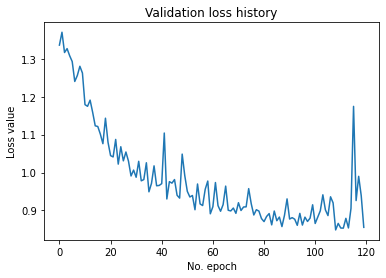

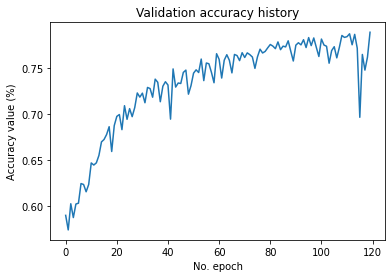

In [36]:
# Visualize history
# Plot history: Loss
plt.plot(history4.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history4.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

Model stays at 75% accuracy level. It's good, but we need find better constructed network. It will be continued.

